In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/train.csv


In [2]:
train_df=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_df=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
train_df.shape, test_df.shape

((42000, 785), (28000, 784))

In [4]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_df.iloc[1,1:].values.reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  18,  30, 137,
        137, 192,  86,  72,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  13,  86, 250, 254, 254,
        254, 254, 217, 246, 151,  32,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

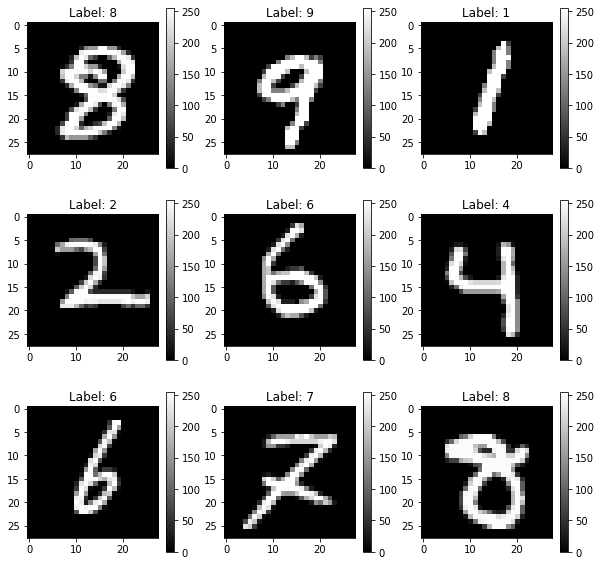

In [6]:
fig=plt.figure(figsize=(10,10))
for i in range(1,10):
    x=np.random.randint(1000)
    fig.add_subplot(3,3,i)
    plt.title('Label: {}'.format(train_df.iloc[x,0]))  
    plt.imshow(train_df.iloc[x,1:].values.reshape(28,28),cmap='gray')  
    plt.colorbar()

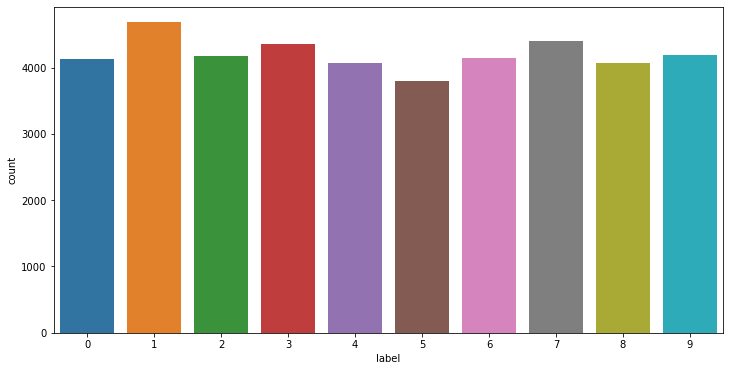

In [7]:
plt.figure(figsize=(12,6))
sns.countplot(data=train_df,x='label')


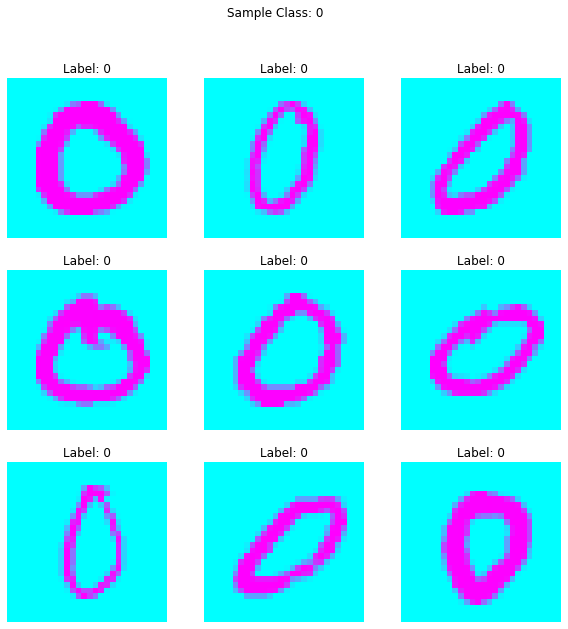

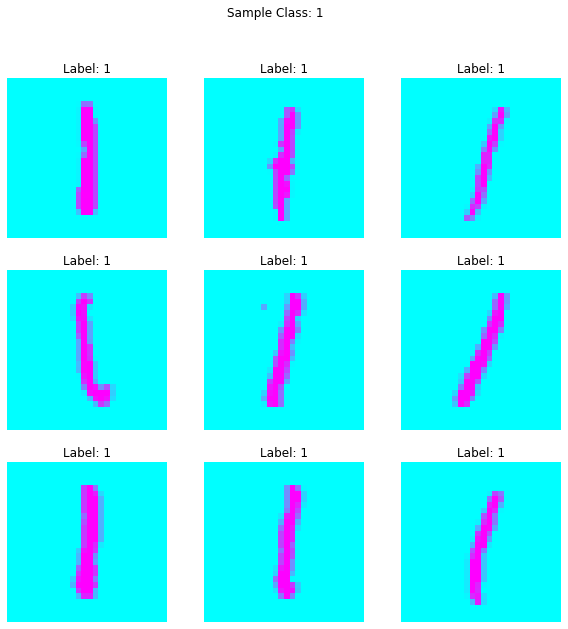

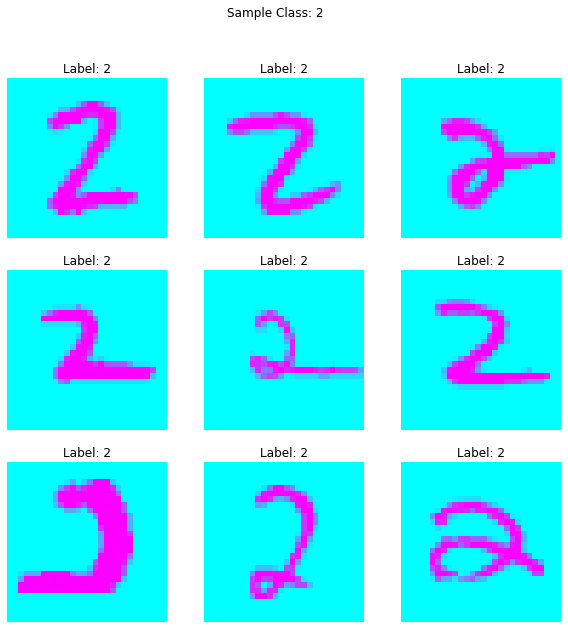

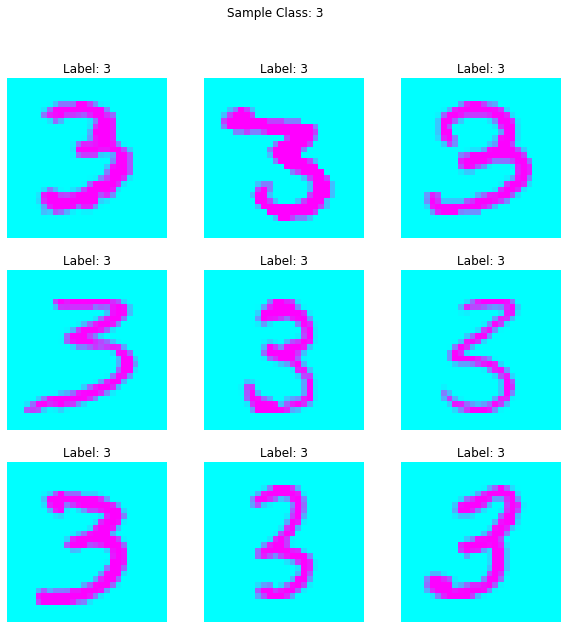

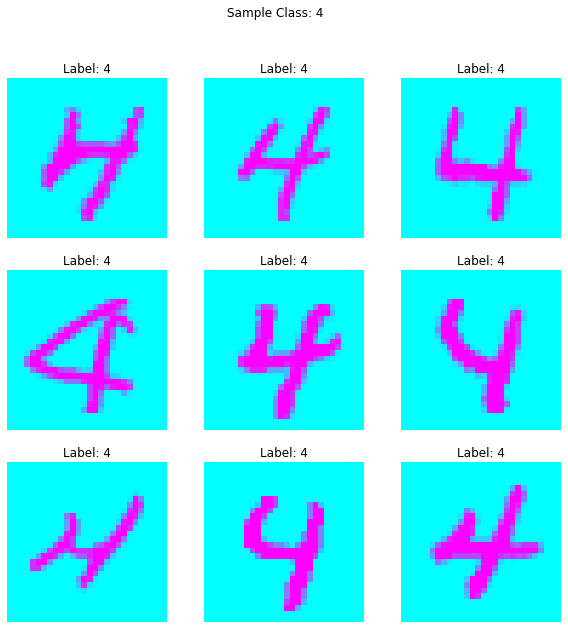

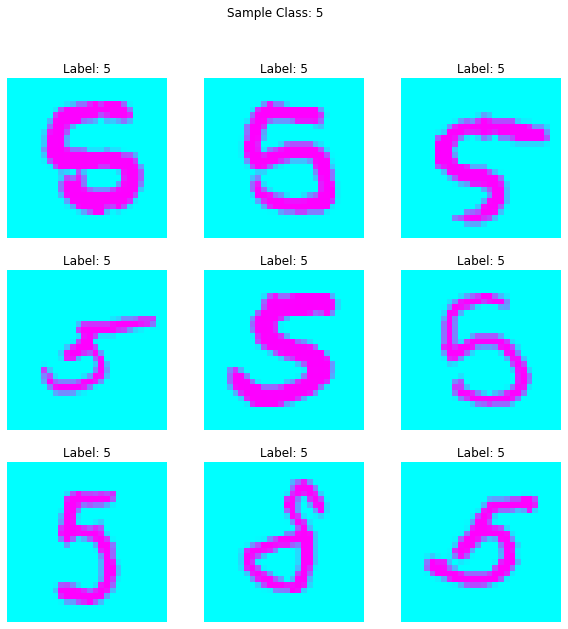

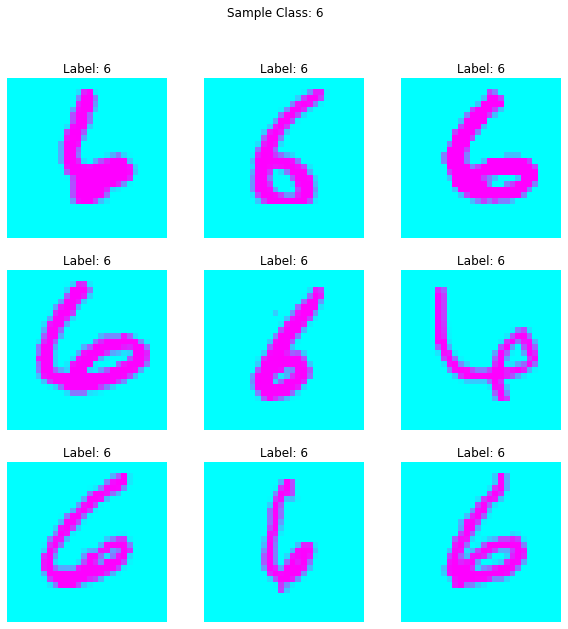

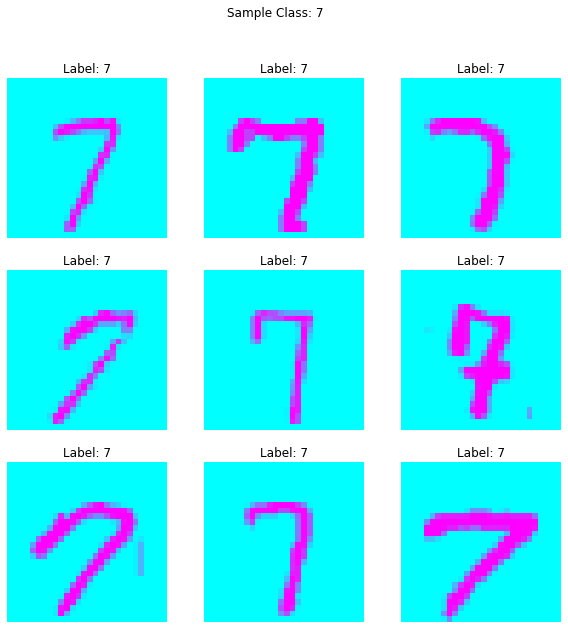

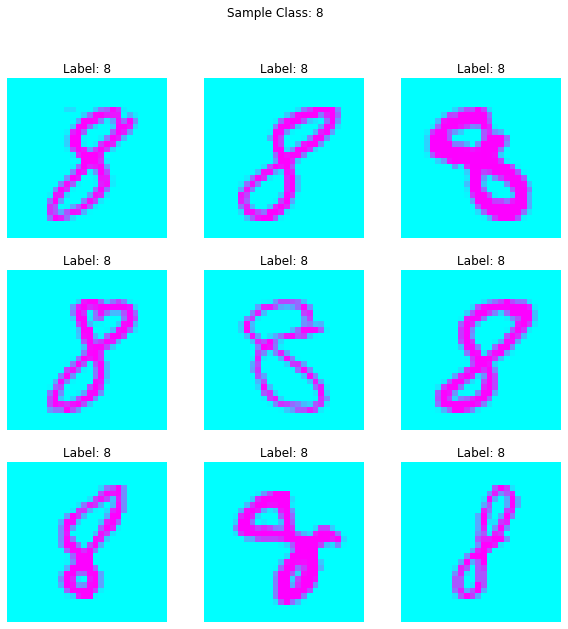

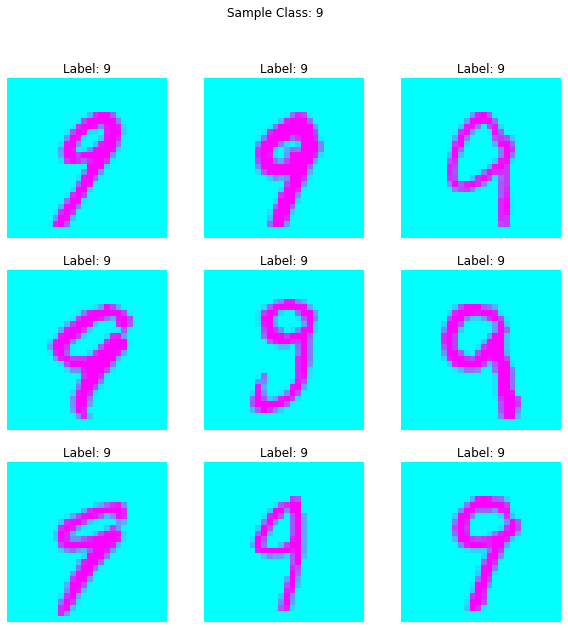

In [8]:
for c in range(0,10):                                       # Range upto Number of class labels
    fig=plt.figure(figsize=(10,10))
    fig.suptitle('Sample Class: {}'.format(c))              # To place title at the centre of the image
    data=train_df[train_df.label==c]
    for i in range(1,10):
        fig.add_subplot(3,3,i)
        plt.title('Label: {}'.format(data.iloc[i,0]))  
        plt.axis('off')
        plt.imshow(data.iloc[i,1:].values.reshape(28,28),cmap='cool')

In [9]:
X=train_df.iloc[:,1:].values                  # Pixels into X
Y=train_df.iloc[:,0]               

In [10]:
from sklearn.preprocessing import MinMaxScaler
norm=MinMaxScaler()
norm.fit(X)
transnorm=norm.transform(X)

In [11]:
X.shape,Y.shape

((42000, 784), (42000,))

In [12]:
from keras.utils import to_categorical
X=X.reshape(-1,28,28,1)
Y=to_categorical(Y,num_classes=10)


Using TensorFlow backend.


In [13]:
X.shape

(42000, 28, 28, 1)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_valid,Y_train,Y_valid=train_test_split(X,Y,test_size=0.2,random_state=4)

In [15]:
from keras.preprocessing.image import ImageDataGenerator as ImgDataGen
augment_data= ImgDataGen(rescale=1./255,
                        rotation_range=20,
                         height_shift_range=0.2,
                         width_shift_range=0.2,
                         horizontal_flip=False,
                         zoom_range=0.10)

In [16]:
from keras.models import Sequential
from keras.layers import Dropout,Conv2D,MaxPooling2D,Dense,Flatten,BatchNormalization

In [17]:
model=Sequential()

model.add(Conv2D(128,(3,3),input_shape=(28,28,1),activation='relu',data_format='channels_last',name='conv1'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation='relu',name='conv2'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation='relu',name='conv3'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu',name='conv4'))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu',name='conv5'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu',name='conv6'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 26, 26, 128)       1280      
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 128)       512       
_________________________________________________________________
conv2 (Conv2D)               (None, 24, 24, 128)       147584    
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 128)       0         
_________________________________________________________________
conv3 (Conv2D)               (None, 10, 10, 64)       

In [19]:
from tensorflow.keras.utils import plot_model

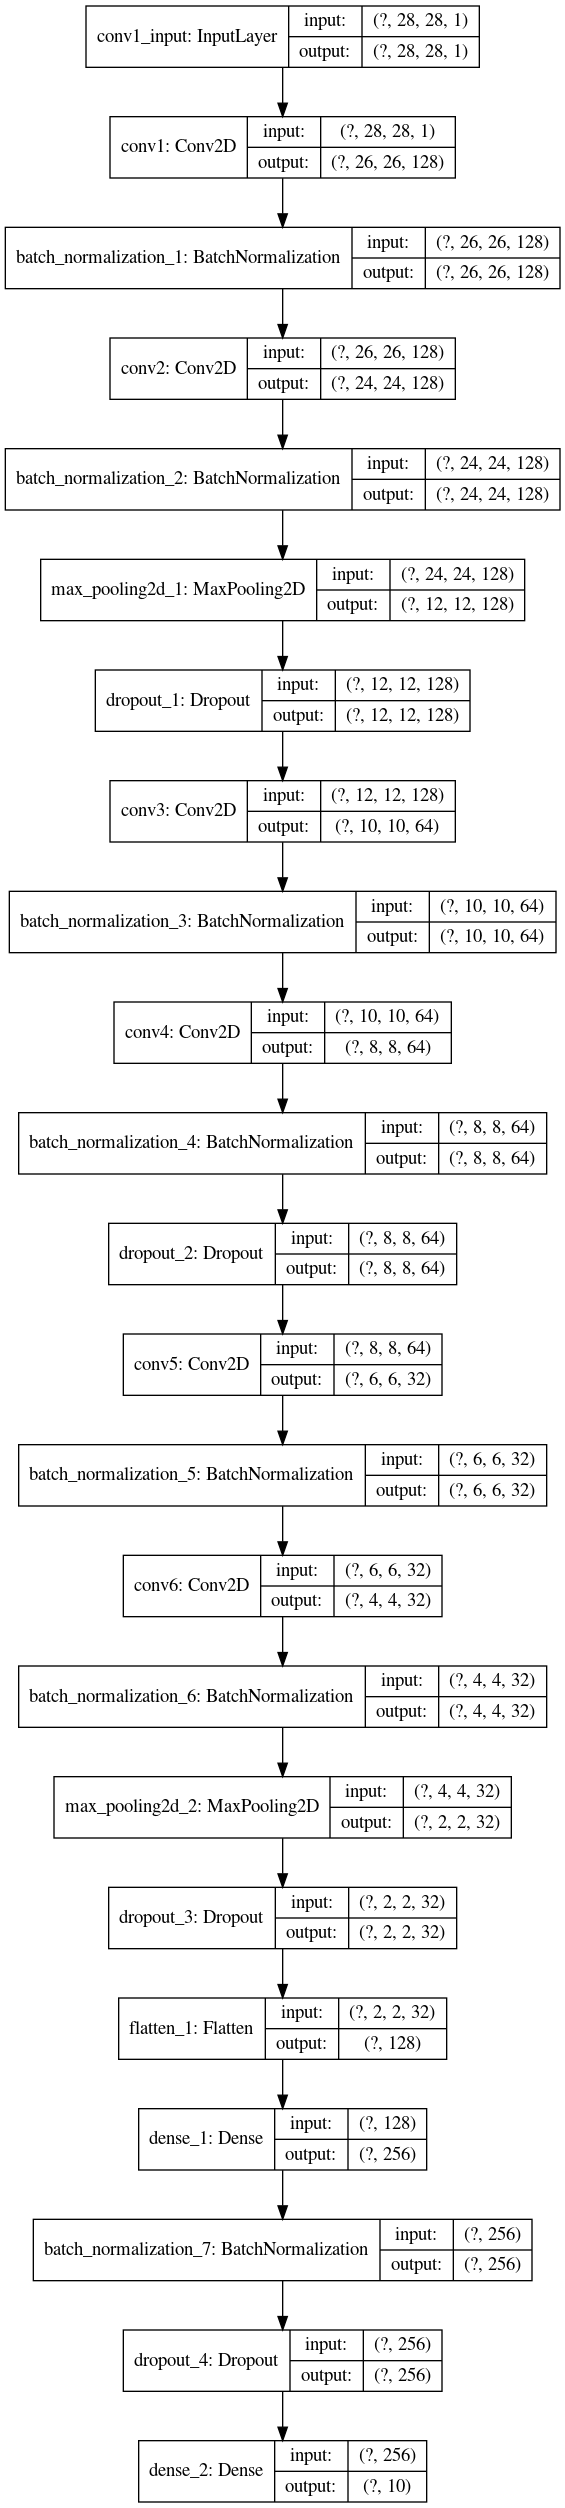

In [20]:
plot_model(model,to_file='model.png',show_shapes=True)

In [21]:
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop=EarlyStopping(monitor="val_accuracy",min_delta=0,patience=10,mode='max',restore_best_weights=True)

In [23]:
history=model.fit_generator(augment_data.flow(X_train, Y_train, batch_size = 64),steps_per_epoch = (len(X_train)*0.8 // 64),
 validation_data = augment_data.flow(X_valid, Y_valid), validation_steps=(len(X_valid)*0.2)//64,epochs = 100,callbacks=[earlystop])

Epoch 1/100
420/420 [==============================] - 25s 59ms/step - loss: 0.9873 - accuracy: 0.6857 - val_loss: 2.5396 - val_accuracy: 0.2560
Epoch 2/100
420/420 [==============================] - 17s 41ms/step - loss: 0.2980 - accuracy: 0.9082 - val_loss: 0.1486 - val_accuracy: 0.9351
Epoch 3/100
420/420 [==============================] - 18s 43ms/step - loss: 0.2123 - accuracy: 0.9369 - val_loss: 0.2451 - val_accuracy: 0.9519
Epoch 4/100
420/420 [==============================] - 18s 44ms/step - loss: 0.1679 - accuracy: 0.9495 - val_loss: 0.0479 - val_accuracy: 0.9663
Epoch 5/100
420/420 [==============================] - 17s 41ms/step - loss: 0.1432 - accuracy: 0.9574 - val_loss: 0.2226 - val_accuracy: 0.9615
Epoch 6/100
420/420 [==============================] - 18s 42ms/step - loss: 0.1282 - accuracy: 0.9614 - val_loss: 0.0359 - val_accuracy: 0.9700
Epoch 7/100
420/420 [==============================] - 19s 45ms/step - loss: 0.1171 - accuracy: 0.9660 - val_loss: 0.0115 - val_ac

In [24]:
loss, acc = model.evaluate(augment_data.flow(X_valid, Y_valid, batch_size=64, seed=2))
print("Loss: {}\nAccuracy: {}".format(loss, acc))

132/132 [==============================] - 4s 27ms/step
Loss: 0.01794913411140442
Accuracy: 0.9821428656578064


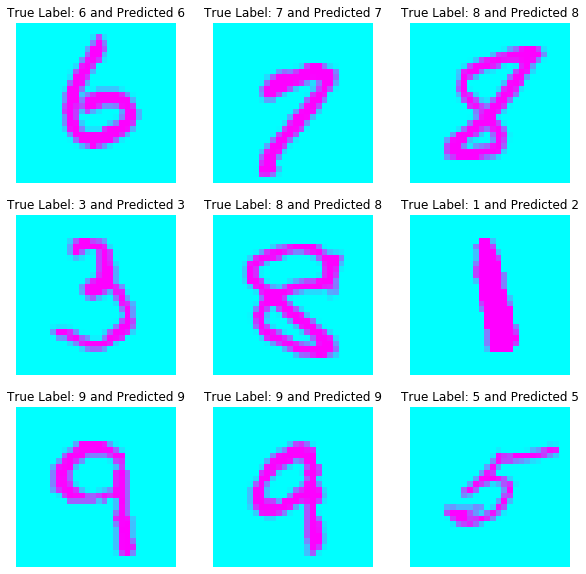

In [25]:
fig=plt.figure(figsize=(10,10))
for i in range(1,10):
    fig.add_subplot(3,3,i)
    x=np.random.randint(len(X_valid))
    plt.imshow(X_valid[x].reshape(28,28), cmap='cool')
    plt.axis('off')
    plt.title('True Label: {} and Predicted {}'.format(np.argmax(Y_valid[x]),np.argmax(model.predict(X_valid[x].reshape(-1,28,28,1)))))

In [26]:
X_test = test_df.iloc[:, :].values

scaler = MinMaxScaler()
scaler.fit(X_test)
X_test = scaler.transform(X_test)

X_test = X_test.reshape(-1, 28, 28, 1)
print('Test Data Shape: ', X_test.shape)

Test Data Shape:  (28000, 28, 28, 1)


In [27]:
predictions = np.argmax(model.predict(X_test), axis=1)

In [28]:
sub = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')
sub['Label'] = predictions

sub.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [29]:
sub.to_csv('MNIST_using_CNN.csv', index=False)